# EDA

## Import Libraries

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
from pandas import DataFrame
pd.options.display.max_columns = None
pd.set_option("display.max_colwidth", -1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_rows", 101)

/home/nathaniel/anaconda3/envs/nba-predictor/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':


## Importing the dataset

In [3]:
DATA_PATH = 'data'

SEASONS_PROCESSED_DS = f"{DATA_PATH}/seasons.processed.feather"

TEAMS_DS = f"{DATA_PATH}/teams.csv"
TEAMS_PROCESSED_DS = f"{DATA_PATH}/teams.processed.feather"

RANKING_DS = f"{DATA_PATH}/ranking.csv"
RANKING_PROCESSED_DS = f"{DATA_PATH}/ranking.processed.feather"

GAMES_DS = f"{DATA_PATH}/games.csv"
GAMES_PROCESSED_DS = f"{DATA_PATH}/games.processed.feather"

In [4]:
games = pd.read_csv(GAMES_DS, parse_dates=["GAME_DATE_EST"], usecols=["GAME_ID",'GAME_DATE_EST', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID',
       'SEASON', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home',
       'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away',
       'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
       'HOME_TEAM_WINS']
                    , infer_datetime_format=True, index_col="GAME_ID")
games = games.sort_values(by=['GAME_DATE_EST', 'GAME_ID'])

teams = pd.read_feather(TEAMS_PROCESSED_DS)

seasons = pd.read_feather(SEASONS_PROCESSED_DS)

rankings = pd.read_csv(RANKING_DS)

games_matchup = pd.read_feather(GAMES_PROCESSED_DS)
games_matchup = games_matchup.set_index(["GAME_ID"])
games_matchup = games_matchup.sort_values(by=['GAME_DATE_EST', 'GAME_ID'])

In [5]:
print(games_matchup.shape)
games_matchup.info()

(4919, 70)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4919 entries, 21500001 to 21801229
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   GAME_DATE_EST          4919 non-null   datetime64[ns]
 1   HOME_TEAM_NAME         4919 non-null   object        
 2   HOME_TEAM_ID           4919 non-null   int64         
 3   VISITOR_TEAM_NAME      4919 non-null   object        
 4   VISITOR_TEAM_ID        4919 non-null   int64         
 5   GAME_STATUS_TEXT       4919 non-null   object        
 6   SEASON                 4919 non-null   int64         
 7   HT_RANK                0 non-null      object        
 8   HT_CLASS               0 non-null      object        
 9   HT_HW                  4919 non-null   int64         
 10  HT_HL                  4919 non-null   int64         
 11  HT_VW                  4919 non-null   int64         
 12  HT_VL                  4919 non-null   i

## Checking null value

In [6]:
games_matchup.isnull().any()

GAME_DATE_EST            False
HOME_TEAM_NAME           False
HOME_TEAM_ID             False
VISITOR_TEAM_NAME        False
VISITOR_TEAM_ID          False
GAME_STATUS_TEXT         False
SEASON                   False
HT_RANK                  True 
HT_CLASS                 True 
HT_HW                    False
HT_HL                    False
HT_VW                    False
HT_VL                    False
HT_LAST10_W              False
HT_LAST10_L              False
HT_LAST10_MATCHUP_W      False
HT_LAST10_MATCHUP_L      False
HT_OVERALL_OFF_POINTS    False
HT_OVERALL_DEF_POINTS    False
HT_OVERALL_OFF_FG        False
HT_OVERALL_DEF_FG        False
HT_OVERALL_OFF_3P        False
HT_OVERALL_DEF_3P        False
HT_OVERALL_OFF_FT        False
HT_OVERALL_DEF_FT        False
HT_OVERALL_OFF_REB       False
HT_OVERALL_DEF_REB       False
HT_AWAY_POINTS           False
HT_AWAY_FG               False
HT_AWAY_3P               False
HT_AWAY_FT               False
HT_AWAY_REB              False
VT_RANK 

## Unique enteries in each of the columns

In [7]:
games_matchup.nunique()

GAME_DATE_EST            659 
HOME_TEAM_NAME           30  
HOME_TEAM_ID             30  
VISITOR_TEAM_NAME        30  
VISITOR_TEAM_ID          30  
GAME_STATUS_TEXT         1   
SEASON                   4   
HT_RANK                  0   
HT_CLASS                 0   
HT_HW                    136 
HT_HL                    114 
HT_VW                    110 
HT_VL                    123 
HT_LAST10_W              11  
HT_LAST10_L              11  
HT_LAST10_MATCHUP_W      11  
HT_LAST10_MATCHUP_L      11  
HT_OVERALL_OFF_POINTS    3906
HT_OVERALL_DEF_POINTS    3971
HT_OVERALL_OFF_FG        120 
HT_OVERALL_DEF_FG        116 
HT_OVERALL_OFF_3P        175 
HT_OVERALL_DEF_3P        156 
HT_OVERALL_OFF_FT        207 
HT_OVERALL_DEF_FT        163 
HT_OVERALL_OFF_REB       3182
HT_OVERALL_DEF_REB       3265
HT_AWAY_POINTS           2020
HT_AWAY_FG               101 
HT_AWAY_3P               149 
HT_AWAY_FT               186 
HT_AWAY_REB              1758
VT_RANK                  0   
VT_CLASS  

## Visualizing the data

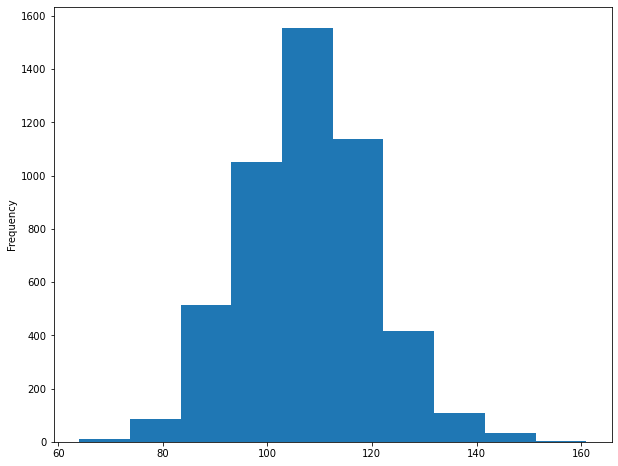

In [8]:
games_matchup["PTS_home"].plot.hist(bins=10, figsize=(10,8))

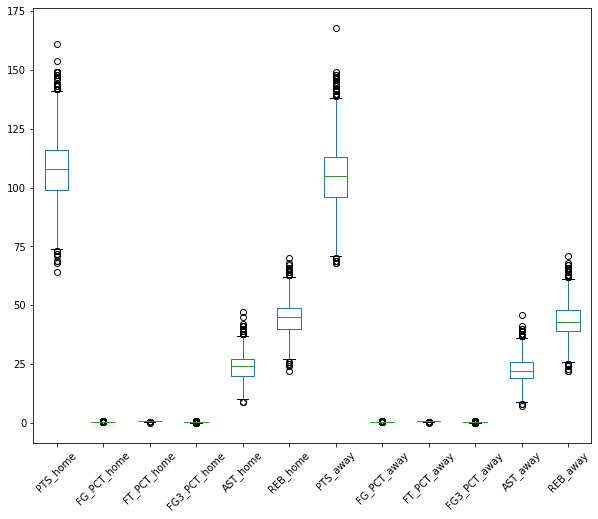

In [9]:
boxplot = games_matchup.boxplot(grid=False, rot=45, figsize=(10, 8), column=[    "PTS_home",
"FG_PCT_home",
"FT_PCT_home",
"FG3_PCT_home",
"AST_home",
"REB_home",
"PTS_away",
"FG_PCT_away",
"FT_PCT_away",
"FG3_PCT_away",
"AST_away",
"REB_away"])

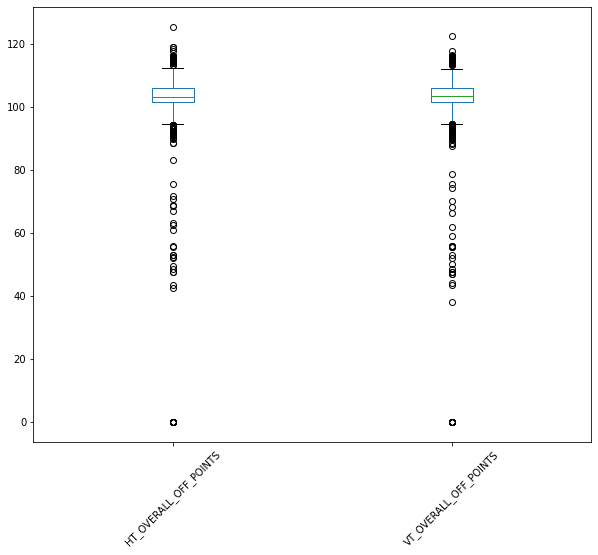

In [10]:
boxplot = games_matchup.boxplot(grid=False, rot=45, figsize=(10, 8), column=["HT_OVERALL_OFF_POINTS",
"VT_OVERALL_OFF_POINTS"])

In [13]:
len(games_matchup.loc[games_matchup["HT_OVERALL_OFF_POINTS"] > 108])

550

In [ ]:
#sns.pairplot(games_matchup)